In [1]:
import pandas as pd
import numpy as np
import re
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load dataset
df = pd.read_csv("phishing_site_urls.csv")  # Change to your dataset path

In [3]:
# Check and rename columns if needed
print(df.columns)  # Check column names
if 'URL' in df.columns:
    df.rename(columns={'URL': 'url'}, inplace=True)
if 'Label' in df.columns:
    df.rename(columns={'Label': 'label'}, inplace=True)

Index(['URL', 'Label'], dtype='object')


In [4]:
# Ensure labels are lowercase
df['label'] = df['label'].str.lower()

In [5]:
# Feature extraction
def preprocess_url(url):
    url = url.lower()
    url = re.sub(r"https?://", "", url)
    url = re.sub(r"www.", "", url)
    return url

df['clean_url'] = df['url'].apply(preprocess_url)

In [6]:
# Split data
X = df['clean_url']
y = df['label'].map({'good': 0, 'bad': 1})  # Mapping labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
# Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [8]:
# Train model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [9]:
# Evaluate model
y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.956812596705197


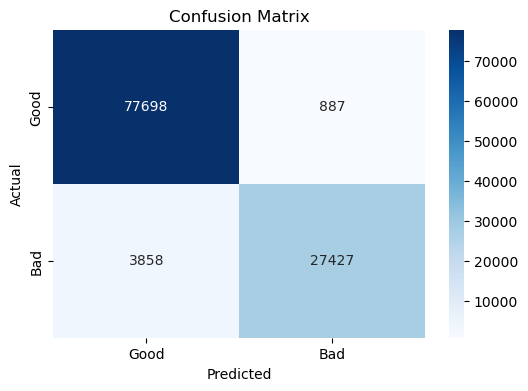

In [10]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [11]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     78585
           1       0.97      0.88      0.92     31285

    accuracy                           0.96    109870
   macro avg       0.96      0.93      0.95    109870
weighted avg       0.96      0.96      0.96    109870



In [12]:
# Save model and vectorizer
with open("phishing_detector.pkl", "wb") as f:
    pickle.dump(model, f)
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

In [13]:
# Real-time prediction function
def predict_url(url):
    url = preprocess_url(url)
    url_tfidf = vectorizer.transform([url])
    prediction = model.predict(url_tfidf)
    return "bad" if prediction[0] == 1 else "good"

In [19]:
# Example usage
url_input = input("Enter URL: ")
print("Prediction:", predict_url(url_input))

Enter URL:  info@homeservices.nobroker.in


Prediction: bad
